# Importing all the required libraries

In [1]:
# Load libraries
import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

#Various machinie learning models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Loading the dataset

In [2]:
url = "C:/Users/ASUS/Desktop/Intellipaat/Datasets/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pandas.read_csv(url, names=names)

# Summarizing the dataset

In [3]:
# shape
print(dataset.shape)

(151, 5)


In [4]:
# head
print(dataset.head(20))

    sepal-length  sepal-width  petal-length  petal-width        class
0   sepal_length  sepal_width  petal_length  petal_width      species
1            5.1          3.5           1.4          0.2  Iris-setosa
2            4.9            3           1.4          0.2  Iris-setosa
3            4.7          3.2           1.3          0.2  Iris-setosa
4            4.6          3.1           1.5          0.2  Iris-setosa
5              5          3.6           1.4          0.2  Iris-setosa
6            5.4          3.9           1.7          0.4  Iris-setosa
7            4.6          3.4           1.4          0.3  Iris-setosa
8              5          3.4           1.5          0.2  Iris-setosa
9            4.4          2.9           1.4          0.2  Iris-setosa
10           4.9          3.1           1.5          0.1  Iris-setosa
11           5.4          3.7           1.5          0.2  Iris-setosa
12           4.8          3.4           1.6          0.2  Iris-setosa
13           4.8    

In [5]:
# descriptions
print(dataset.describe())

       sepal-length sepal-width petal-length petal-width        class
count           151         151          151         151          151
unique           36          24           44          23            4
top               5           3          1.5         0.2  Iris-setosa
freq             10          26           14          28           50


In [6]:
# class distribution
print(dataset.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
species             1
dtype: int64


# Data Visualization

In [7]:
#univariate: box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

TypeError: no numeric data to plot

In [9]:
# histograms
dataset.hist()
plt.show()

ValueError: hist method requires numerical or datetime columns, nothing to plot.

In [8]:
#multi-variate: scatter plot matrix
scatter_matrix(dataset)
plt.show()

ValueError: Number of columns must be a positive integer, not 0

<Figure size 640x480 with 0 Axes>

# Creating a Validation Dataset

In [10]:
# Load libraries

# Split-out validation dataset - Dividing our dataset into train and test
array = dataset.values
X = array[:,0:4]
Y = array[:,4]
validation_size = 0.20
seed = 7
scoring = 'accuracy'
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)


# Building Models

In [11]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

ValueError: Setting a random_state has no effect since shuffle is False. You should leave random_state to its default (None), or set shuffle=True.

# Comparing Algorithms and Select the best model

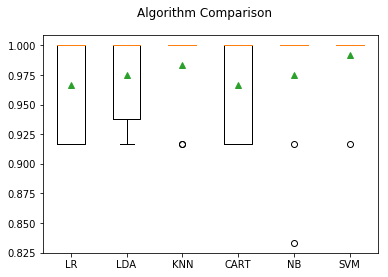

In [13]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results,showmeans = True)
ax.set_xticklabels(names)
plt.show()

# Make Prediction 
Since Accuracy will not always be the metric to select the best model from

In [14]:
# Make predictions on validation dataset
svm = SVC(gamma='auto')
svm.fit(X_train, Y_train)
predictions = svm.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9333333333333333
[[ 7  0  0]
 [ 0 10  2]
 [ 0  0 11]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       1.00      0.83      0.91        12
 Iris-virginica       0.85      1.00      0.92        11

    avg / total       0.94      0.93      0.93        30



In [15]:
# Make predictions on validation dataset
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9
[[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.85      0.92      0.88        12
 Iris-virginica       0.90      0.82      0.86        11

    avg / total       0.90      0.90      0.90        30



In [2]:
pip install streamlit

Note: you may need to restart the kernel to use updated packages.
